IMPORT ALL THE NECESSARY LIBRARIES

In [ ]:
import csv

from matplotlib import pyplot as plt


%matplotlib inline

LOAD DATASET

In [ ]:
import csv

p = 5  ## window for weighted moving average
date_dict={}
path_to_dataset = '/content/drive/MyDrive/SLDC_Data/2023/01/'  ## path for dataset
dates = ['01-01-2023.csv','02-01-2023.csv','03-01-2023.csv','04-01-2023.csv','05-01-2023.csv','06-01-2023.csv', '07-01-2023.csv'] ## set dates for weighted moving average



READ DATASET

In [ ]:
for i in range(len(dates)):
    date_dict[dates[i]] = []
    time = []
    for d in csv.DictReader(open(path_to_dataset+dates[i]), delimiter=','):
        time.append(d['time'])
        # print(d['value'])
        date_dict[dates[i]].append(float(d['value']))
n = len(date_dict[dates[len(dates)-1]])

WMA WITH Optimized Weights

In [ ]:
weight = [0.7298354456835626, 0.03994445274603616, 0.058171908939927, -0.02050127818757358, 0.17064293392224444]

l=0
forecast_dict={}
for i in range(len(weight),len(dates)):
    s = dates[i][0:-4]
    forecast_dict[s]=[]

print(forecast_dict)

for j in range(n):
    # print(len(dates),len(weight))
    forecast = [0]*(len(dates)-len(weight))
    for i in range(len(weight),len(dates)):
        total_weight=0
        for k in range(len(weight)):
            try:
              # print(k,i,date_dict[dates[i-k-1]][j])
              forecast[i-len(weight)] +=  (date_dict[dates[i-k-1]][j])*weight[k]
              total_weight+=weight[k]
            except:
              pass
        forecast[i-len(weight)] = forecast[i-len(weight)]/total_weight
        s = dates[i][0:-4]
        forecast_dict[s].append(forecast[i-len(weight)])
        
            

{'06-01-2023': [], '07-01-2023': []}


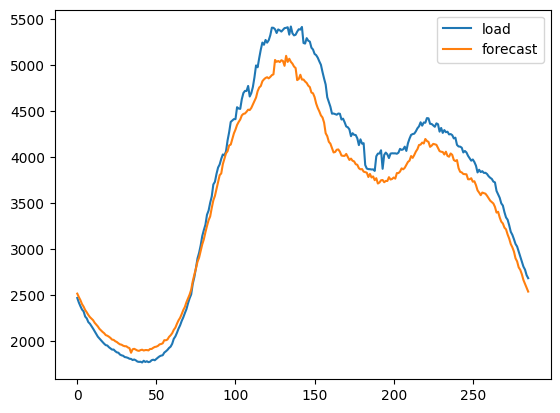

In [ ]:
plt.plot(date_dict[dates[len(dates)-2]])
s=dates[len(dates)-2][:-4]
plt.plot(forecast_dict[s])
plt.legend(['load', 'forecast'])
plt.show()

## ALGORITHM TO OPTIMIZE WEIGHTS FOR WEIGHTED MOVING **AVERAGE**

In [ ]:
# optimizing weights for weighted average

weight = [0.2,0.2,0.2,0.2,0.2]
l=0
while(l<10000):
    a = [0]*(len(weight))
    gd = 0
    for j in range(n):
        forecast = [0]*(len(dates)-len(weight))
        for i in range(len(weight),len(dates)):
            for k in range(len(weight)):
                forecast[i-len(weight)] +=  (date_dict[dates[i-k-1]][j])*weight[k]
#             forecast[i-len(weight)] += dic[dates[i-len(weight)]][j]
            for k in range(len(weight)):
                a[k] += ((forecast[i-len(weight)]-date_dict[dates[i]][j])*(date_dict[dates[i-k-1]][j]))/((len(dates)-len(weight))*50000000*n)
                gd += (((forecast[i-len(weight)]-date_dict[dates[i]][j])**2))/(2*(len(dates)-len(weight))*n)
    for k in range(len(weight)): weight[k] -= a[k] 
#     weight[len(weight)-1] = 1
#     for k in range(len(weight)-1): weight[len(weight)-1] -=  weight[k]
    l += 1
    #if abs(a[0]) <= 0.0001 and abs(a[1]) <= 0.0001 and abs(a[2]) <= 0.0001 and abs(a[3]) <= 0.0001: break
    print(gd,weight)
print(sum(weight))